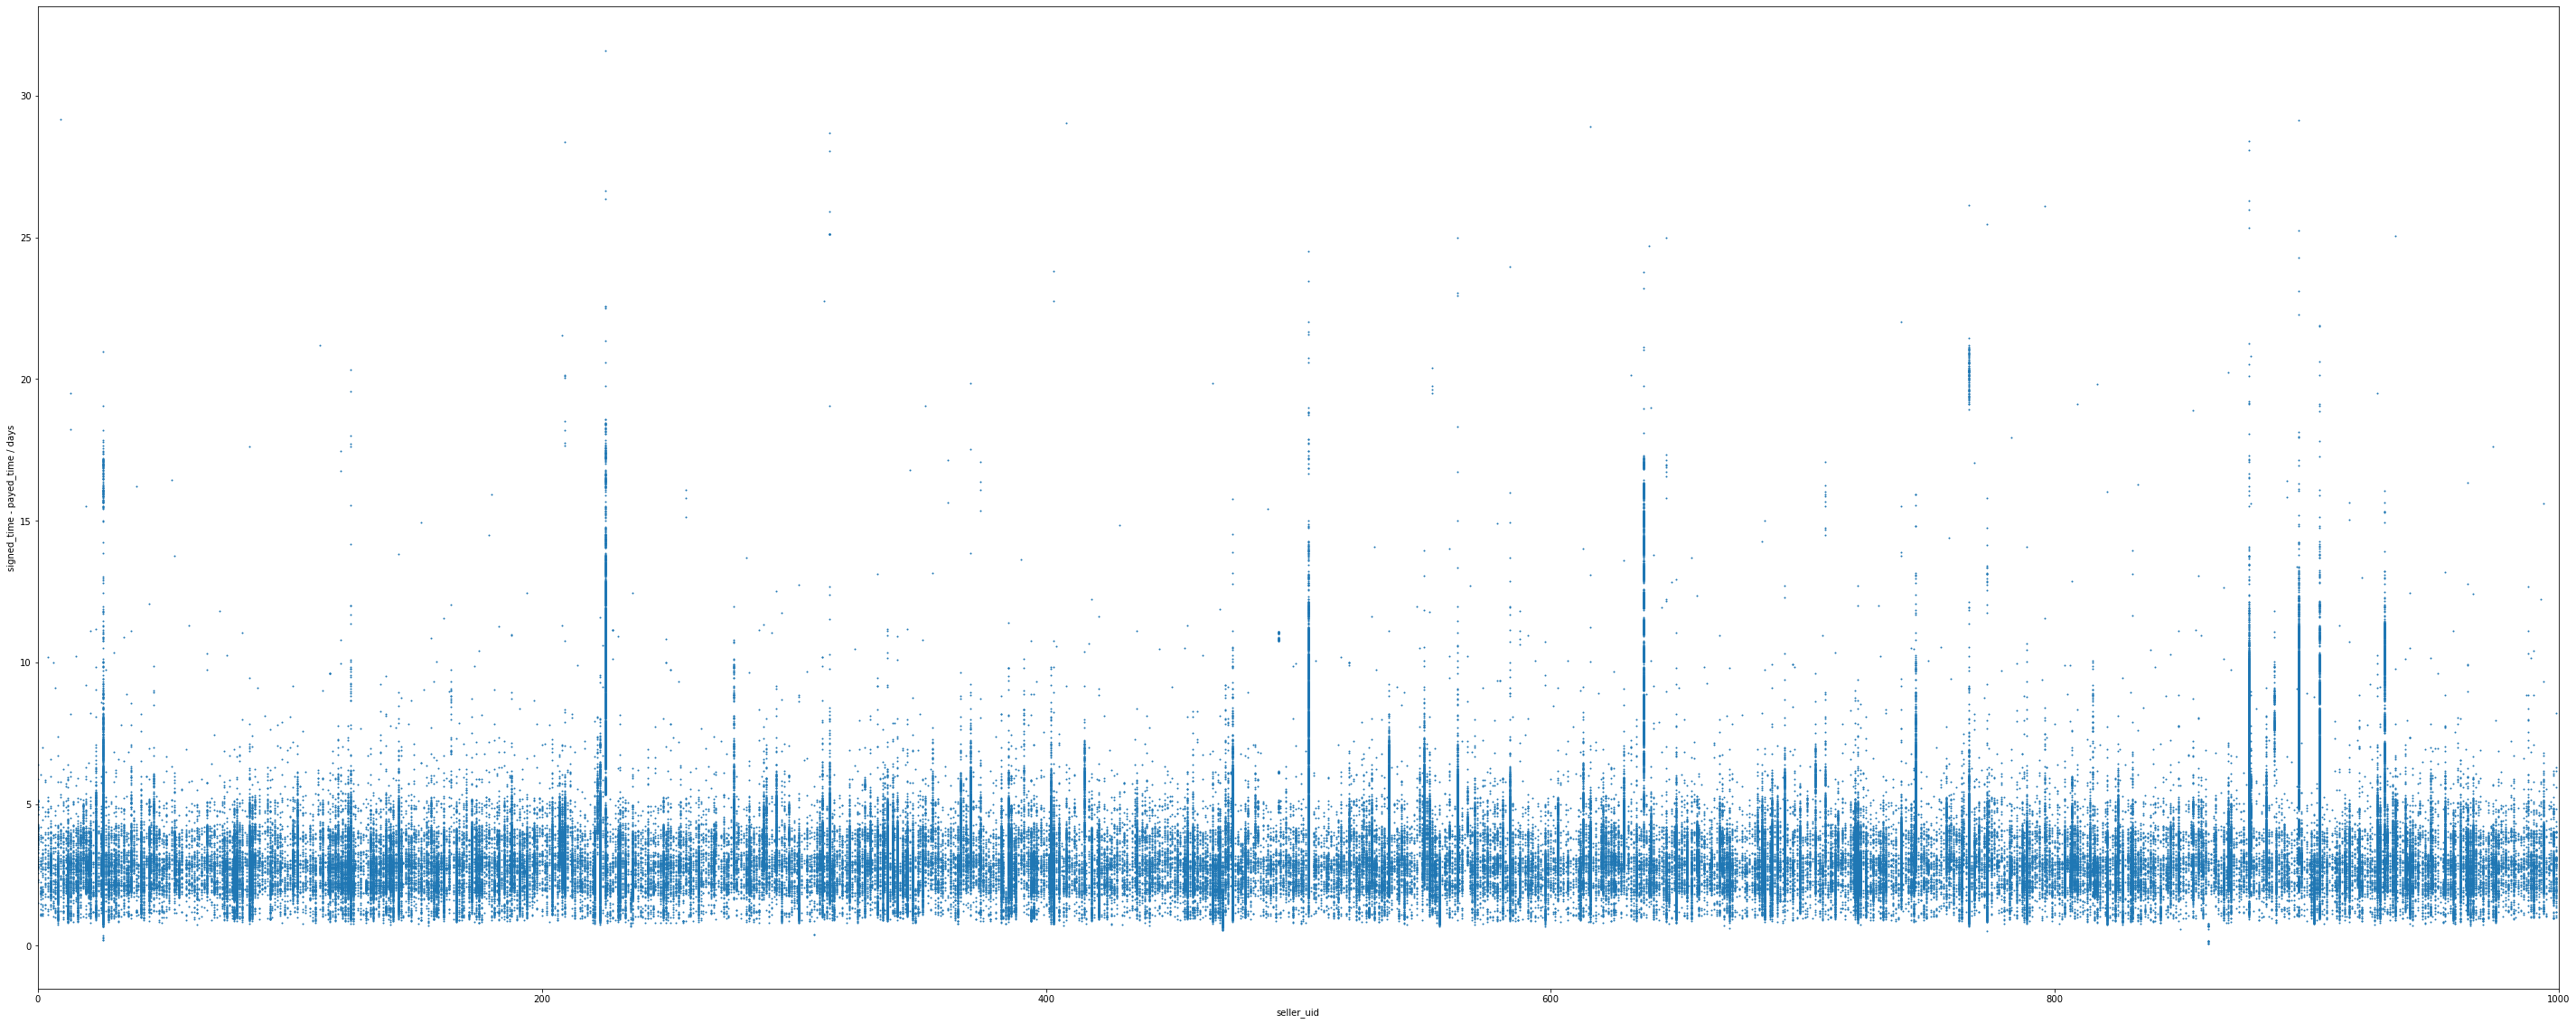

In [31]:
#将图片内嵌在交互窗口，而不是弹出一个图片窗口
#%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib.ticker import MultipleLocator

data = open('data/SeedCup_pre_train.csv', 'r')
header = data.readline()[:-1].split('\t')
orders = []
x = []
y = []
for lines in data:
    raw = lines[:-1].split('\t')
    fields = {}
    idx = 0
    for item in header:
        fields[item] = raw[idx]
        idx+=1 
    orders.append(fields)
for order in orders:
    try:
        time = datetime.fromisoformat(order['signed_time']) - datetime.fromisoformat(order['payed_time'])
        time = time.total_seconds()/60/60/24
        if time < 0:
            continue
        x.append(int(order['seller_uid']))
        y.append(time)
    except:
        pass
plt.figure(figsize=(50, 20))
plt.xlim(0, 1000)

plt.ylabel('signed_time - payed_time / days')
plt.xlabel('seller_uid')
plt.plot(x, y, '.', markersize=2)
#下面行不写会出现 [<matplotlib.lines.Line2D at 0x111814390>] 字样
plt.savefig('signed-payed.png')
plt.show() 


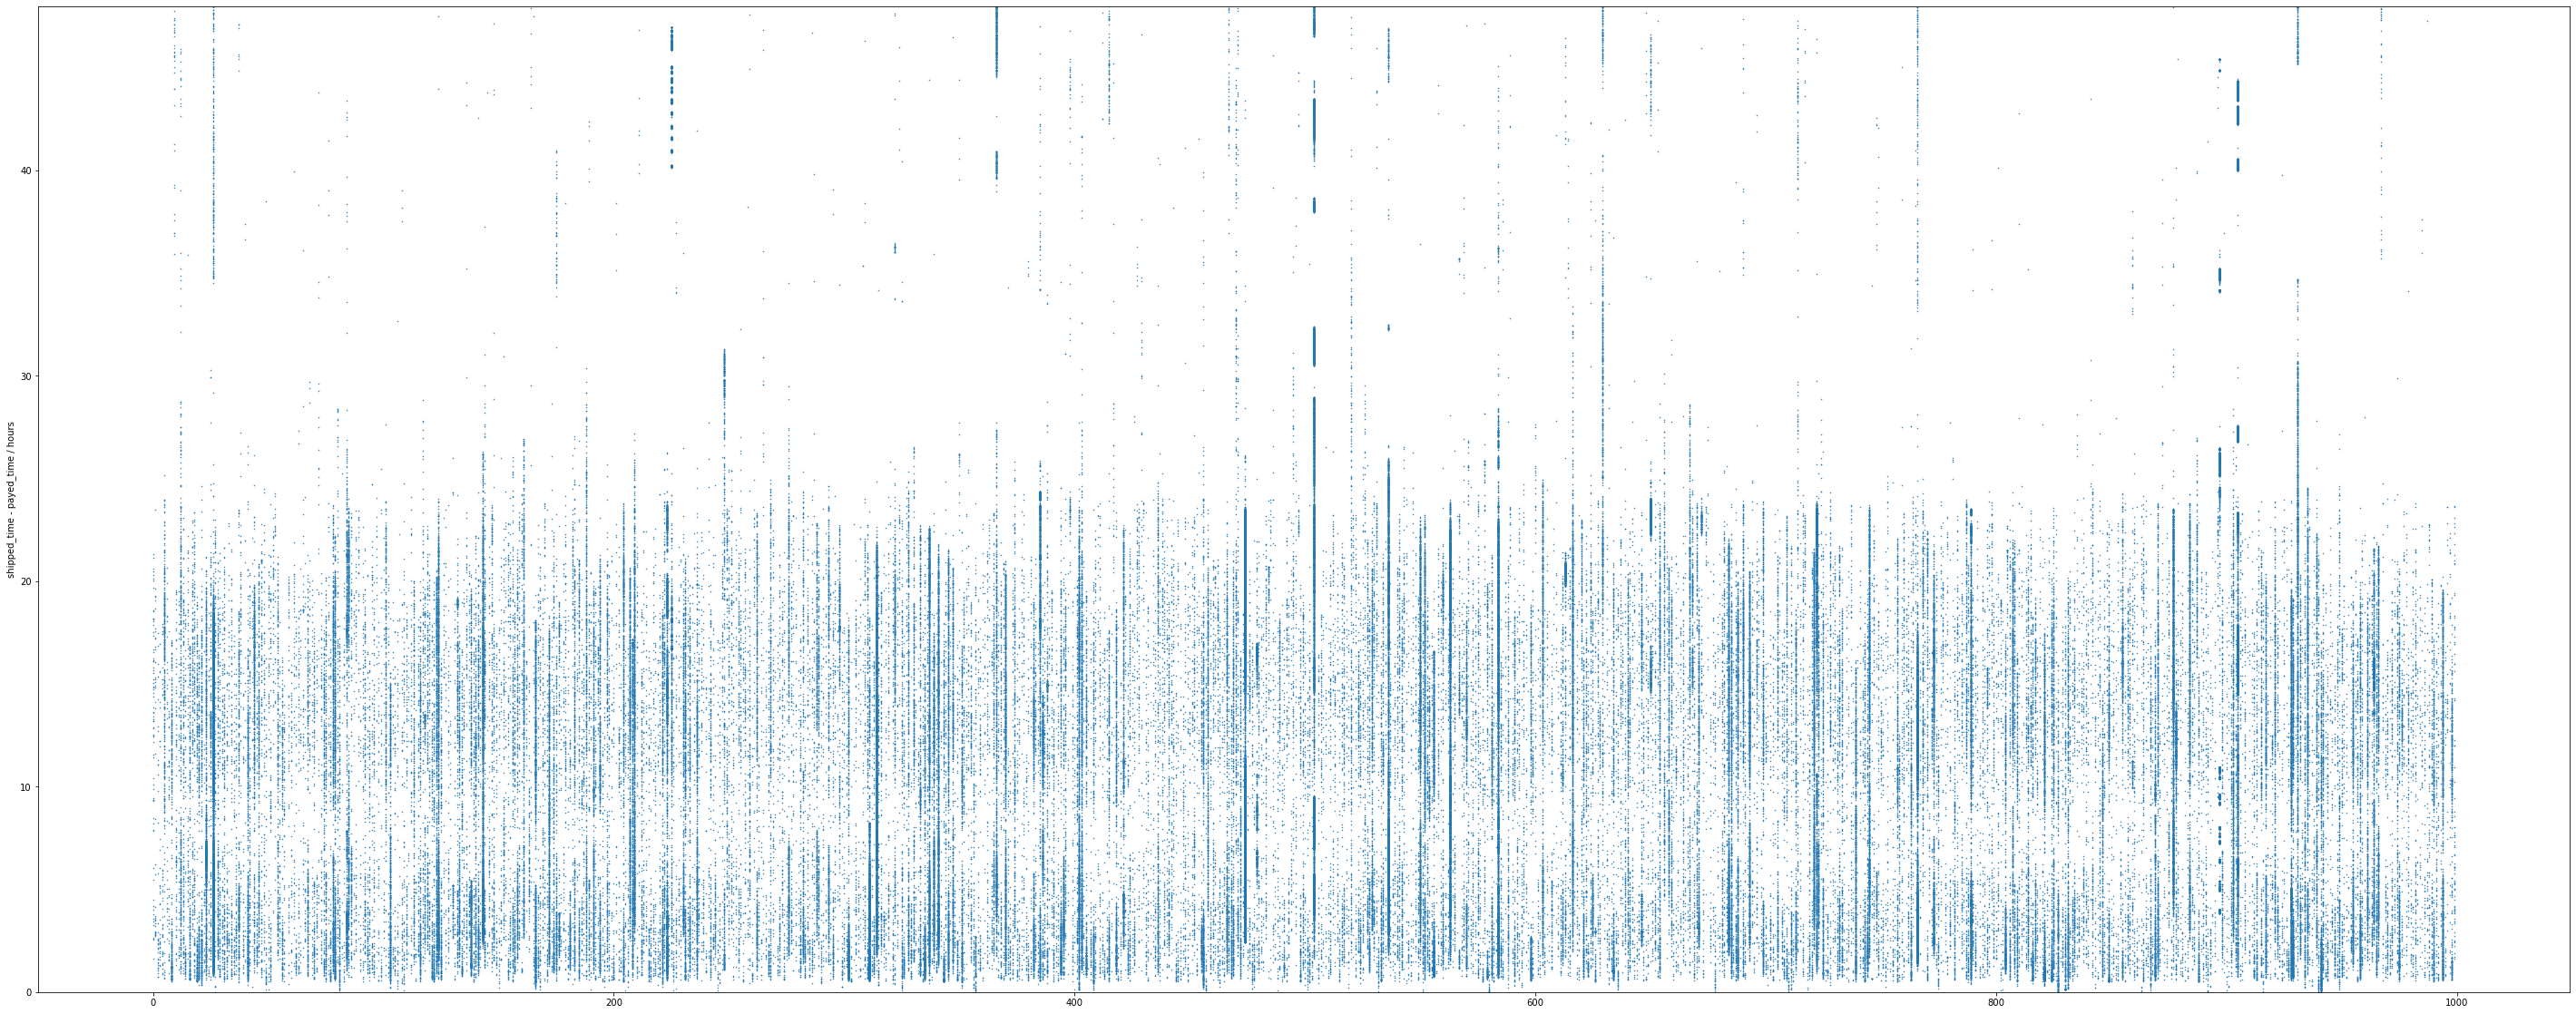

In [44]:
x = []
y = []
for order in orders:
    try:
        time = datetime.fromisoformat(order['shipped_time']) - datetime.fromisoformat(order['payed_time'])
        time = time.total_seconds()/60/60
        if time < 0:
            continue
        x.append(int(order['seller_uid']))
        y.append(time)
    except:
        pass
plt.figure(figsize=(50, 20))
plt.ylabel('shipped_time - payed_time / hours')
plt.ylim([0, 48])
plt.plot(x, y, '.', markersize=1)
plt.savefig('shipped-payed.png')
plt.show()

In [39]:
f = open('paid-shipped-gapday', 'w')
for order in orders:
    content = order['payed_time'] + ' ' + order['shipped_time']
    pay = datetime.fromisoformat(order['pay_time'])
    ship = datetime.fromisoformat(order['shipped_time'])
    f.write(content + '\n')

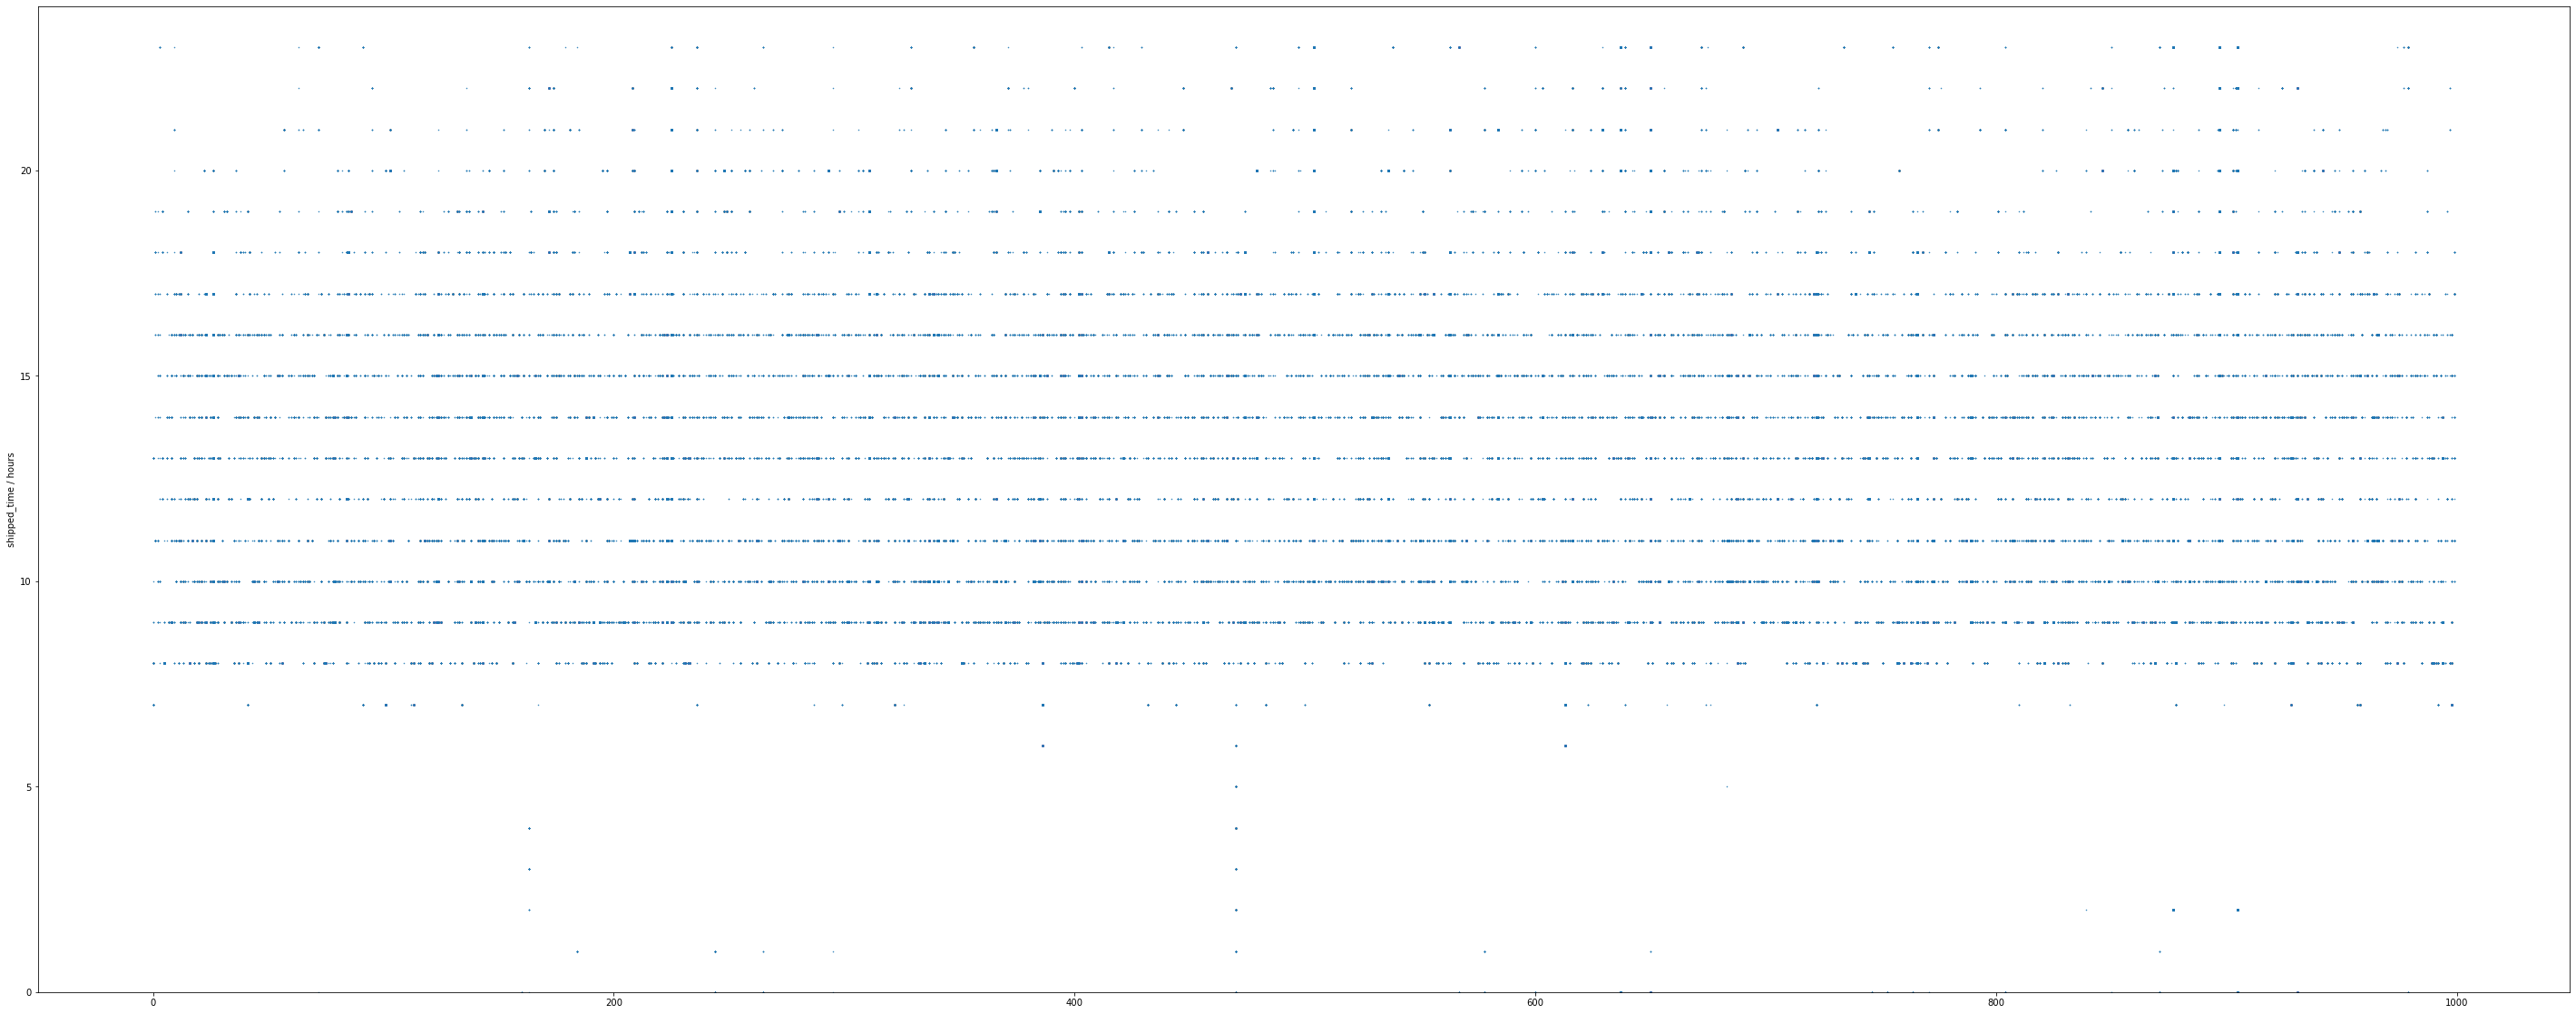

In [43]:
x = []
y = []
for order in orders:
    try:
        time = datetime.fromisoformat(order['shipped_time']).hour
        if time < 0:
            continue
        x.append(int(order['seller_uid']))
        y.append(time)
    except:
        pass
plt.figure(figsize=(50, 20))
plt.ylabel('shipped_time / hours')
plt.ylim([0, 24])
plt.plot(x, y, '.', markersize=1)
plt.savefig('shippd_hour.png')
plt.show()